In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [22]:
df1 = pd.read_csv("/Users/sara/Documents/training_set.csv")
df2 = pd.read_csv("/Users/sara/Documents/test_set.csv")

In [23]:
# train data features
df1_x=df1.iloc[:, 2:-1]
df1_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   u - g   11573 non-null  float64
 1   g - r   11573 non-null  float64
 2   r - i   11573 non-null  float64
 3   i - z   11573 non-null  float64
dtypes: float64(4)
memory usage: 361.8 KB


In [24]:
# train data outcomes
df1_y=df1.iloc[:, 6:7]
df1_y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11573 entries, 0 to 11572
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   class   11573 non-null  int64
dtypes: int64(1)
memory usage: 90.5 KB


In [25]:
# test data features and outcome
df2_x=df2.iloc[:, 2:-1]
df2_y=df2.iloc[:, 6:7]

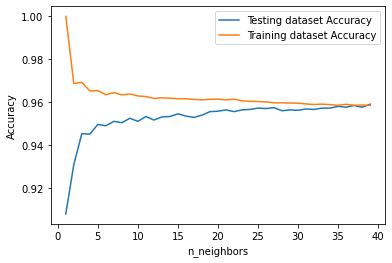

In [26]:
# identifying optimal k-value
neighbors = np.arange(1, 40)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
 
# Loop over K values
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(df1_x, df1_y.values.ravel())
     
    # Compute training and test data accuracy
    train_accuracy[i] = knn.score(df1_x, df1_y.values.ravel())
    test_accuracy[i] = knn.score(df2_x, df2_y.values.ravel())

# Generate plot
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')
 
plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

In [27]:
# training and testing KNN
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(df1_x, df1_y.values.ravel())
Y_pred = knn.predict(df2_x)

In [28]:
# training accuracy
knn.score(df1_x, df1_y.values.ravel())

0.9585241510412166

In [29]:
# test accuracy
knn.score(df2_x,df2_y.values.ravel())

0.9580074104569781

In [27]:
print(confusion_matrix(df2_y, Y_pred))
print(classification_report(df2_y, Y_pred))

[[2640    0   36]
 [   1 1106   24]
 [  66   77  908]]
              precision    recall  f1-score   support

           1       0.98      0.99      0.98      2676
           2       0.93      0.98      0.96      1131
           3       0.94      0.86      0.90      1051

    accuracy                           0.96      4858
   macro avg       0.95      0.94      0.95      4858
weighted avg       0.96      0.96      0.96      4858



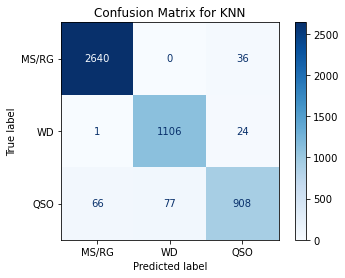

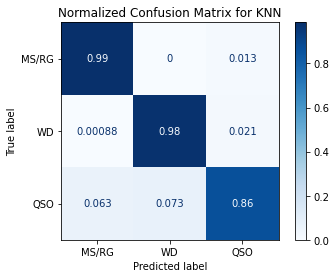

In [32]:
from sklearn.metrics import ConfusionMatrixDisplay
#plt.rcParams.update(plt.rcParamsDefault)
class_names = ['MS/RG', 'WD', 'QSO']
titles_options = [("Confusion Matrix for KNN", None),
                  ("Normalized Confusion Matrix for KNN", "true")]

for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(knn, df2_x, df2_y, 
                                                 display_labels=class_names, 
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

plt.show()